In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

In [2]:
# Functions with use

# Core Python

## append() -- Adds its argument as a single element to the end of a list. The length of the list increases by one.
## enumerate() -- Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.
## hist() -- Plot a histogram, {bins = bars of histogram }
## legend() --  aPlace a legend on the Axes.
## xlabel/ylabel -- labels for axes

# Numpy

## np.abs() -- Calculate the absolute value element-wise.

# Scipy

## stats.zscore -- this function computes the relative Z-score of the input data, relative to the sample mean and standard deviation.

# Pandas

## read_csv -- Used to read a csv file
## DataFrame.head() -- Print dataset n number of rows
## DataFrame.info() -- Prints metadata
## DataFrame.shape() -- Prints Dimensionality
## DataFrame.isnull() -- Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. 
## DataFrame.sum -- Return the sum of the values over the requested axis.
## DataFrame.isnull().sum() -- Return the number of missing values in the data set.
## DataFrame.target -- TBF
## DataFrame.value_counts() -- Return a Series containing counts of unique rows in the DataFrame.
## DataFrame.loc() -- Access a group of rows and columns by label(s) or a boolean array.
## DataFrame.columns() -- Return the column labels of the given Dataframe.
## DataFrame.quantile() -- Return values at the given quantile over requested axis.
## DataFrame.all() -- Return whether all elements are True, potentially over an axis.
## DataFrame.corr() -- Compute pairwise correlation of columns, excluding NA/null values.
## DataFrame.drop() -- Drop specified labels from rows or columns.
## DataFrame.corrwith() -- Compute pairwise correlation.
## DataFrame.describe() -- Generate descriptive statistics.
## get_dummies() -- Convert categorical variable into dummy/indicator variables.

# Matplotlib.pyplot

## figure() -- Create a new figure, or activate an existing figure.
## subplot() -- Add an Axes to the current figure or retrieve an existing Axes.
## tight_layout() -- Adjust the padding between and around subplots.

# Seaborn --> sns

## heatmap() -- Plot rectangular data as a color-encoded matrix.
## set_context() -- Set the parameters that control the scaling of plot elements.
## pairplot() -- Plot pairwise relationships in a dataset.

#! Sklearn

# sklearn.preprocessing

## StandardScaler() -- Standardize features by removing the mean and scaling to unit variance.
    ### fit_transform() -- Fit to data, then transform it.

# sklearn.model_selection

## train_test_split() -- Split arrays or matrices into random train and test subsets (some default values for train and test datasets are assumed).
## cross_val_score() -- Evaluate a score by cross-validation.

# sklearn.neighbors

## KNeighborsClassifier() -- Classifier implementing the k-nearest neighbors vote.

# sklearn.metrics

## confusion_matrix() -- Compute confusion matrix to evaluate the accuracy of a classification.
## classification_report() -- Build a text report showing the main classification metrics.
## accuracy_score() -- Accuracy classification score.

# To use hvplot it is necessary to define bars using pandas.DataFrame.loc and then combine bars created using syntax: (bar1 * bar2).opts(plot options...)

In [3]:
# Load Dataset
df = pd.read_csv("heart_disease.csv")

In [4]:
# Print dataset n number of rows
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
# Dataset info (metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Dataset Dimensionality analysis
df.shape

(303, 14)

In [7]:
# Feature Engineering

In [8]:
## NULL analysis

df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
### Plot

df.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

### Evaluating according to gender/sex

with_disease = df.loc[df['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [10]:
### Evaluating according to chest pain

with_disease = df.loc[df['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4)
without_disease = df.loc[df['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4)

(without_disease * with_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

In [11]:
### Evaluating according to fasting blood sugar

with_disease = df.loc[df['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)


:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

In [12]:
### Evaluating according to resting ECG

with_disease = df.loc[df['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * without_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

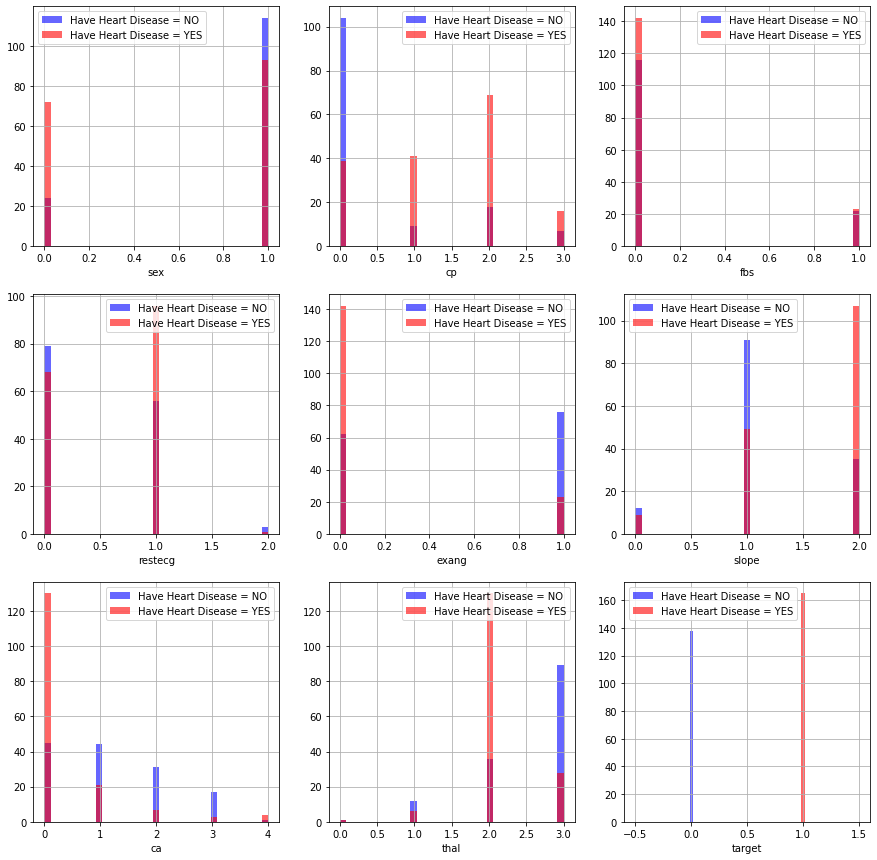

In [13]:
## Extracting and Exploring Categorical Variables

### Categorical Variable Analysis is done to see distint groups of datapoints, while continuous variable analysis is done to see trends

cat_val = []
cont_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
            cat_val.append(column)
    else:
        cont_val.append(column)
        
cat_val

plt.figure(figsize=(15, 15))

for i, column in enumerate(cat_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

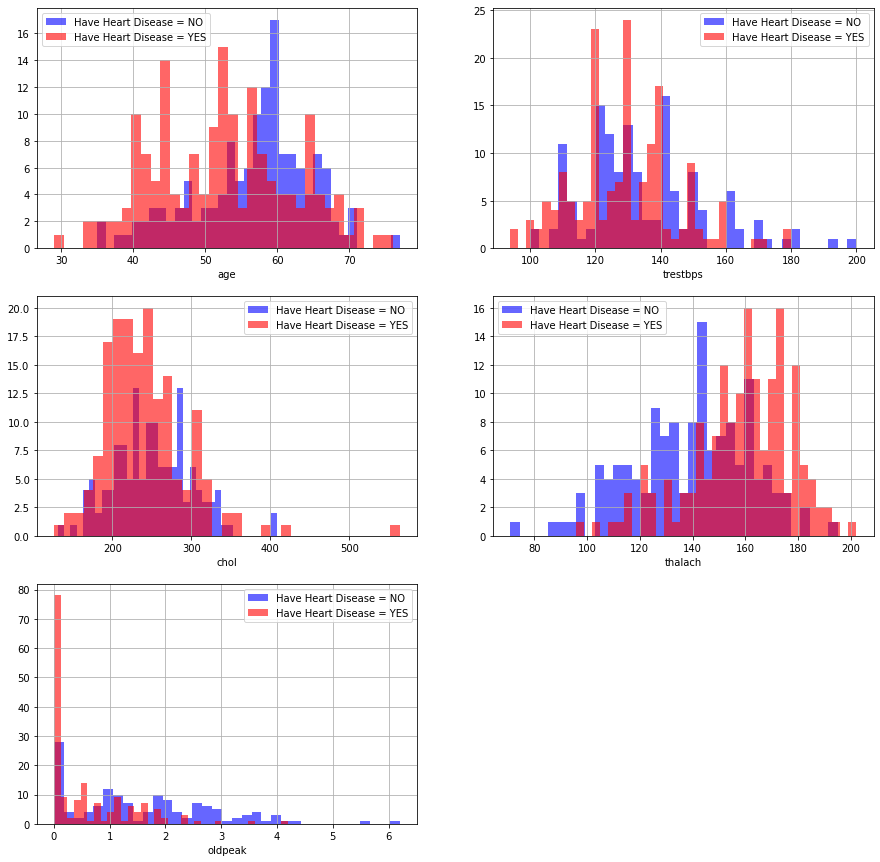

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

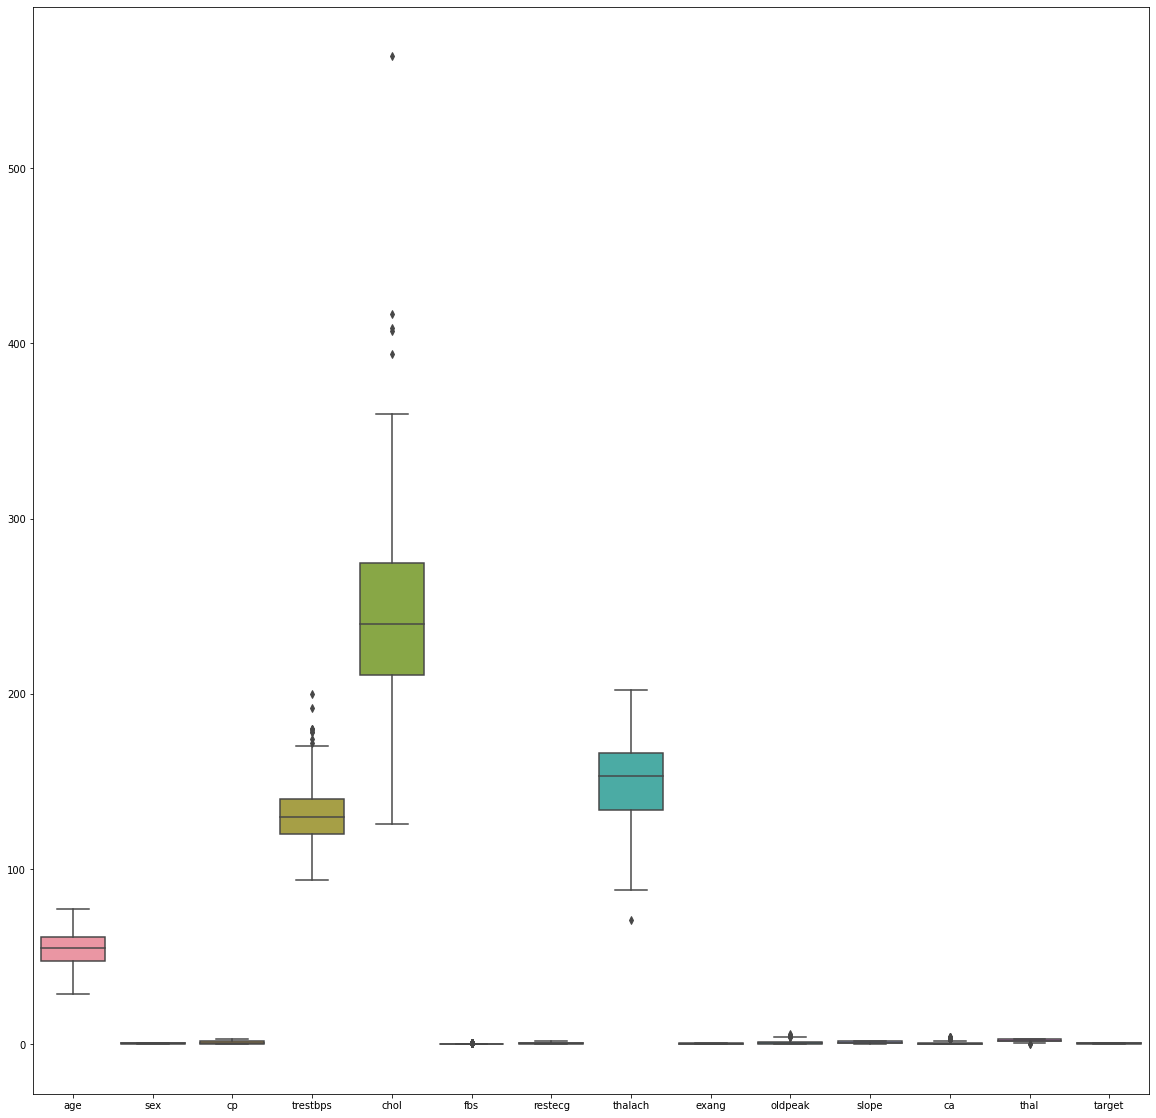

In [15]:
# Outlier Exploration

## Analysis

plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df)

In [16]:
## Outlier Removal

from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

          age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956  0.256334  2.394438  1.005832   
1    1.915313  0.681005  1.002577  0.092738  0.072199  0.417635  0.898962   
2    1.474158  1.468418  0.032031  0.092738  0.816773  0.417635  1.005832   
3    0.180175  0.681005  0.032031  0.663867  0.198357  0.417635  0.898962   
4    0.290464  1.468418  0.938515  0.663867  2.082050  0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464  1.468418  0.938515  0.478391  0.101730  0.417635  0.898962   
299  1.033002  0.681005  1.973123  1.234996  0.342756  0.417635  0.898962   
300  1.503641  0.681005  0.938515  0.706843  1.029353  2.394438  0.898962   
301  0.290464  0.681005  0.938515  0.092738  2.227533  0.417635  0.898962   
302  0.290464  1.468418  0.032031  0.092738  0.198357  0.417635  1.005832   

      thalach     exang   oldpeak     slope        ca      thal    target  

In [17]:
## Printing z-score with third standard deviation

threshold = 3
print(np.where(zscore > 3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [18]:
## Calculating inter-quartile range

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age         13.5
sex          1.0
cp           2.0
trestbps    20.0
chol        63.5
fbs          0.0
restecg      1.0
thalach     32.5
exang        1.0
oldpeak      1.6
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [19]:
## Printing dimensionality of zscore dataframe with zscore less than 3 (ideal)

df = df[(zscore < 3).all(axis=1)]
df.shape

(287, 14)

In [20]:
## Printing dimensionality by removing outliers

df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(228, 14)

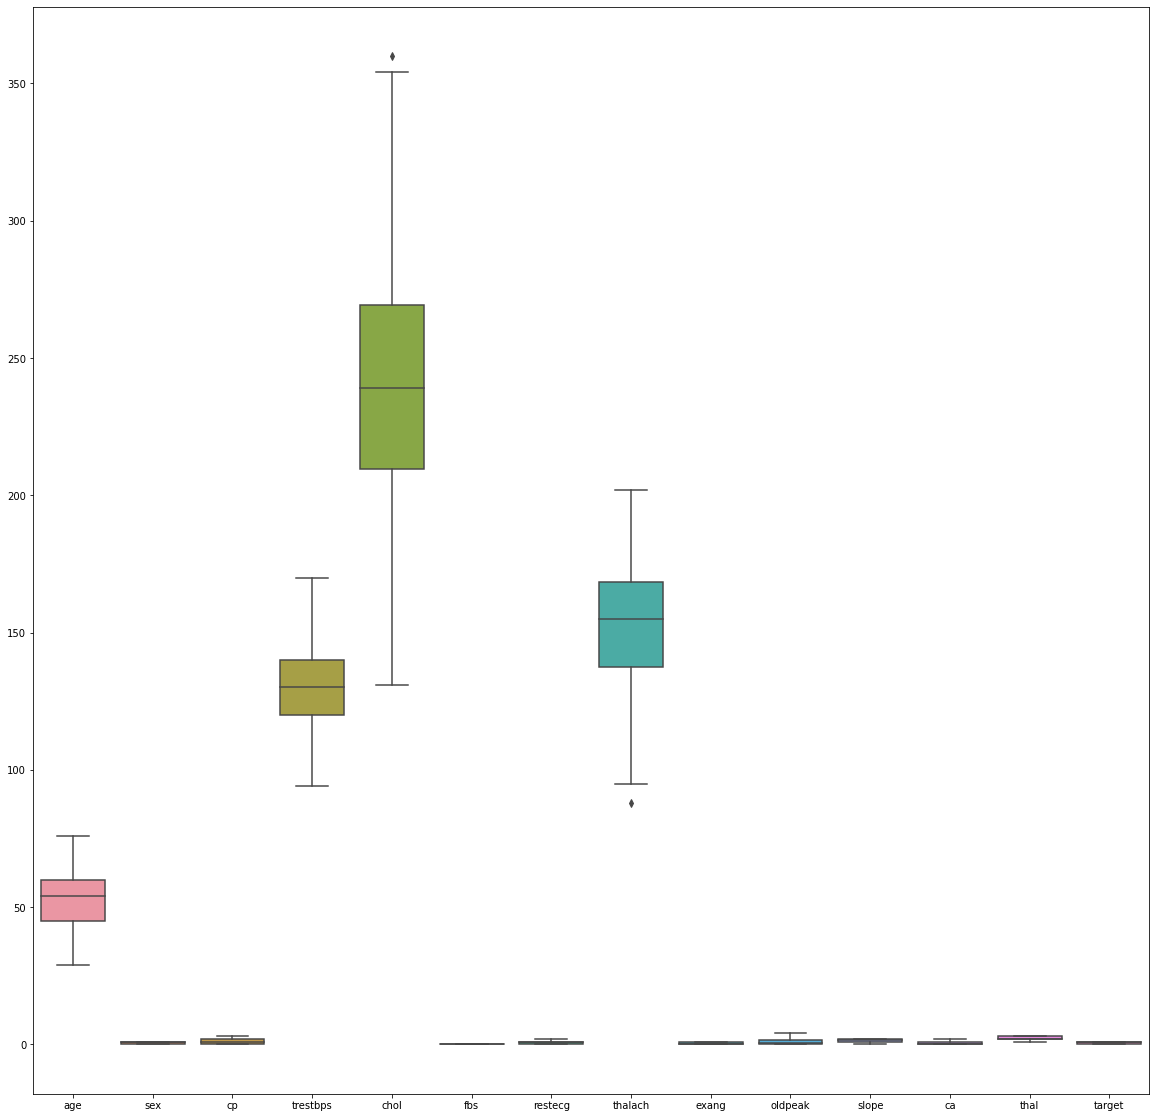

In [21]:
# Plot to check whether the outlier's are removed

plt.figure(figsize=(20,20))
ax= sns.boxplot(data=df)

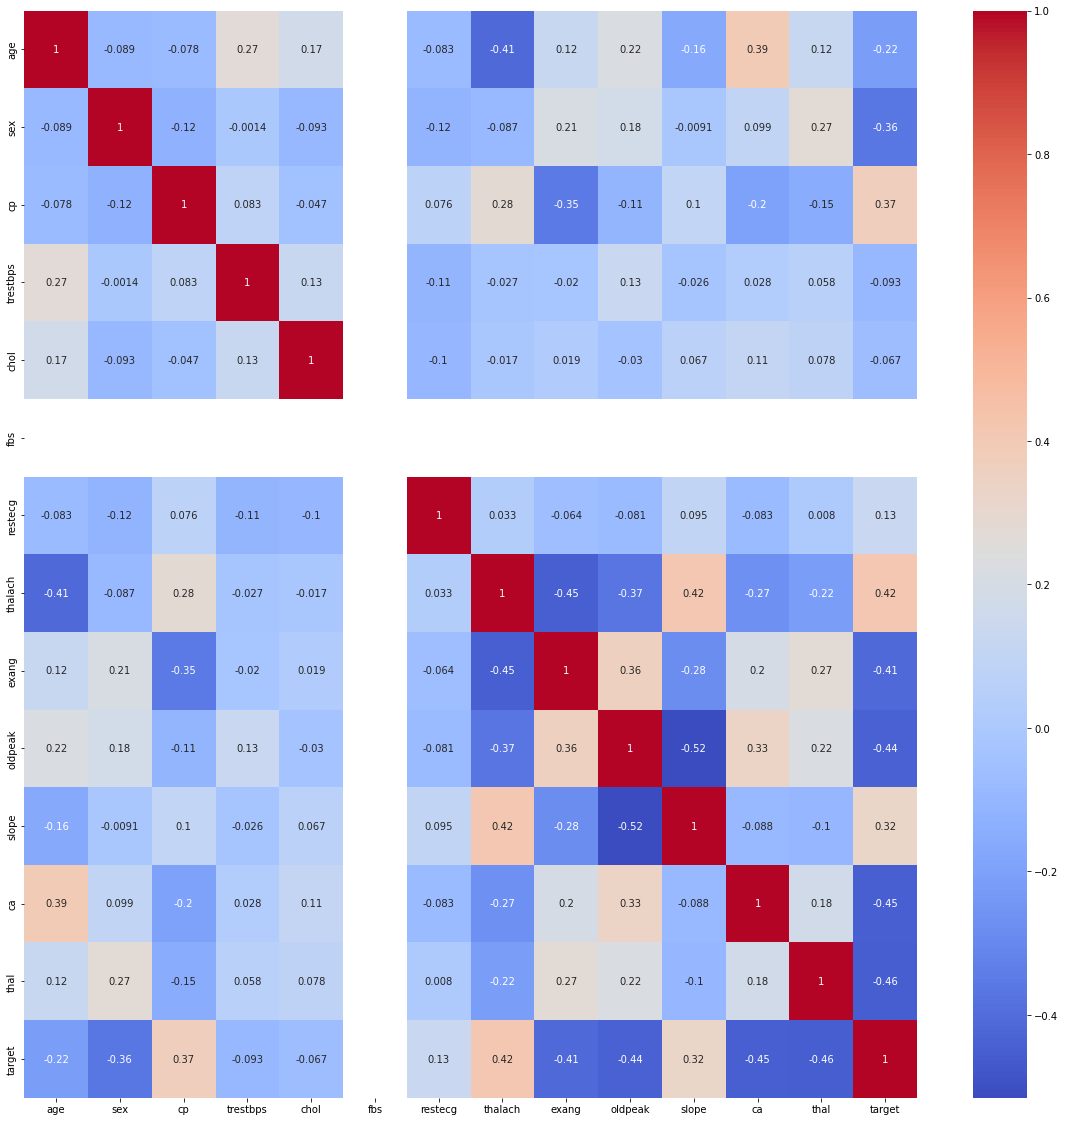

In [22]:
# Correlation Analysis and Feature Selection

plt.figure(figsize=(20,20))
corr = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [23]:
# Feature Scaling Prep

sns.set_context('notebook', font_scale = 2.3)


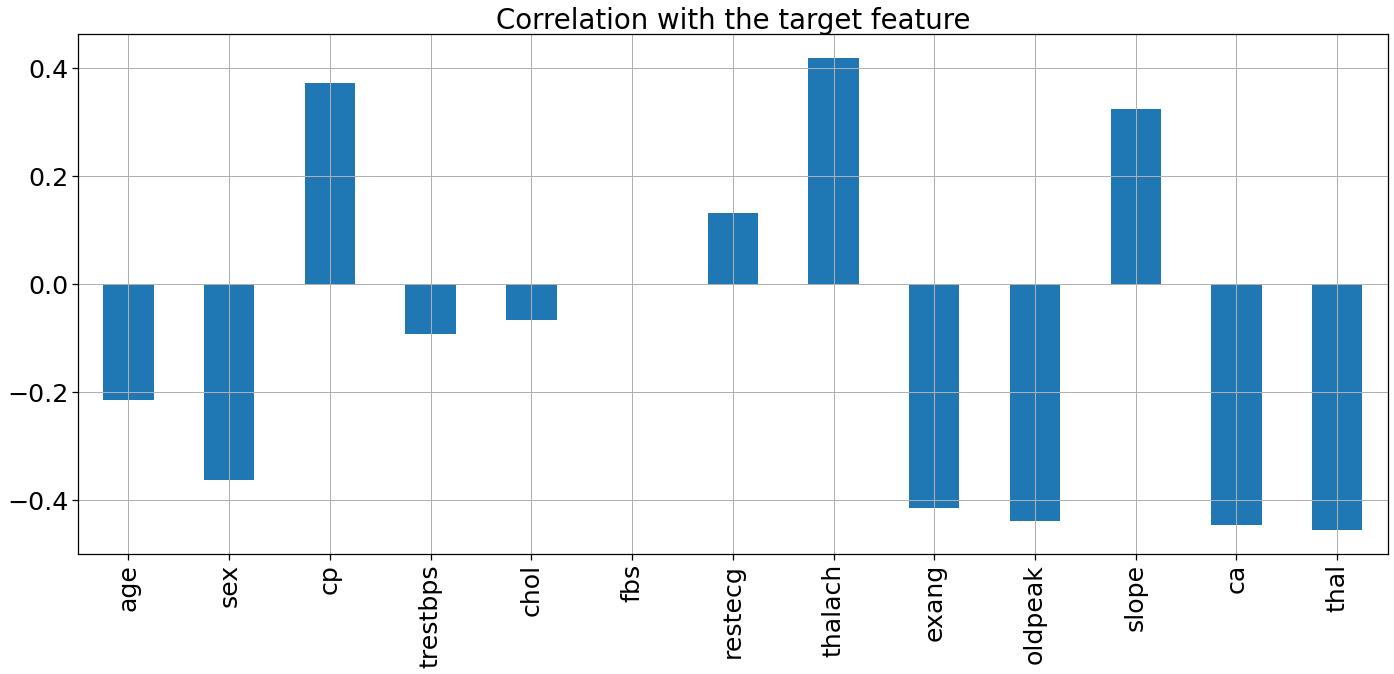

In [24]:
# Label Dropping

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")

plt.tight_layout()

In [25]:
# Exploring descriptive statistics of dataframe

df.describe()

age         sex          cp    trestbps        chol    fbs  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.0   
mean    53.333333    0.675439    0.942982  128.671053  242.372807    0.0   
std      9.229016    0.469241    1.020190   15.349142   44.329827    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     45.000000    0.000000    0.000000  120.000000  209.750000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  239.000000    0.0   
75%     60.000000    1.000000    2.000000  140.000000  269.250000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

          restecg     thalach       exang     oldpeak       slope         ca  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  228.00000   
mean     0.548246  151.070175    0.315789    0.946053    1.451754    0.47807   
std      0.516125   22.492963    0.465852    1.035422    0.587945    0.69893   
min      0.000000   88.000000    0.000000    0.000000    0.000000    0.00000   
25%      0.000000  137.500000    0.000000    0.000000    1.000000    0.00000   
50%      1.000000  155.000000    0.000000    0.600000    1.500000    0.00000   
75%      1.000000  168.250000    1.000000    1.600000    2.000000    1.00000   
max      2.000000  202.000000    1.000000    4.000000    2.000000    2.00000   

             thal      target  
count  228.000000  228.000000  
mean     2.315789    0.578947  
std      0.560299    0.494814  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [26]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
data = pd.get_dummies(df, columns=['sex', 'cp', 'fbs','restecg','exang','slope','ca','thal' ])
columns_to_scale=['age','trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = stdScaler.fit_transform(data[columns_to_scale])

In [27]:
# Exploring dataset

data.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
1 -1.773674  0.086772  0.172434  1.600895  2.472003       1      0      1   
2 -1.339305  0.086772 -0.867525  0.932553  0.439382       1      1      0   
3  0.289579 -0.566164 -0.144075  1.199890 -0.141366       1      0      1   
4  0.398172 -0.566164  2.523646  0.531547 -0.334949       1      1      0   
5  0.398172  0.739707 -1.138819 -0.136795 -0.528532       1      0      1   

   cp_0  cp_1  ...  exang_1  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  \
1     0     0  ...        0        1        0        0     1     0     0   
2     0     1  ...        0        0        0        1     1     0     0   
3     0     1  ...        0        0        0        1     1     0     0   
4     1     0  ...        1        0        0        1     1     0     0   
5     1     0  ...        0        0        1        0     1     0     0   

   thal_1  thal_2  thal_3  
1       0       1       0  
2       0       1       0  
3       0       1       0  
4       0       1       0  
5       1       0       0  

[5 rows x 27 columns]

In [28]:
# Exploring descriptive stats

data.describe()

age      trestbps          chol       thalach       oldpeak  \
count  2.280000e+02  2.280000e+02  2.280000e+02  2.280000e+02  2.280000e+02   
mean  -3.569270e-16 -7.855558e-16 -7.413660e-17 -1.675073e-16 -2.415222e-16   
std    1.002200e+00  1.002200e+00  1.002200e+00  1.002200e+00  1.002200e+00   
min   -2.642413e+00 -2.263797e+00 -2.517895e+00 -2.810165e+00 -9.156982e-01   
25%   -9.049359e-01 -5.661639e-01 -7.375302e-01 -6.046350e-01 -9.156982e-01   
50%    7.239487e-02  8.677171e-02 -7.625177e-02  1.750979e-01 -3.349494e-01   
75%    7.239487e-01  7.397074e-01  6.076344e-01  7.654671e-01  6.329653e-01   
max    2.461426e+00  2.698514e+00  2.659293e+00  2.269238e+00  2.955960e+00   

           target       sex_0       sex_1        cp_0        cp_1  ...  \
count  228.000000  228.000000  228.000000  228.000000  228.000000  ...   
mean     0.578947    0.324561    0.675439    0.473684    0.184211  ...   
std      0.494814    0.469241    0.469241    0.500406    0.388509  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      1.000000    0.000000    1.000000    0.000000    0.000000  ...   
75%      1.000000    1.000000    1.000000    1.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

          exang_1     slope_0     slope_1   slope_2        ca_0        ca_1  \
count  228.000000  228.000000  228.000000  228.0000  228.000000  228.000000   
mean     0.315789    0.048246    0.451754    0.5000    0.640351    0.241228   
std      0.465852    0.214756    0.498762    0.5011    0.480953    0.428770   
min      0.000000    0.000000    0.000000    0.0000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.0000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.5000    1.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.0000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.0000    1.000000    1.000000   

             ca_2      thal_1      thal_2      thal_3  
count  228.000000  228.000000  228.000000  228.000000  
mean     0.118421    0.048246    0.587719    0.364035  
std      0.323817    0.214756    0.493328    0.482217  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000    0.000000  
75%      0.000000    0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 27 columns]

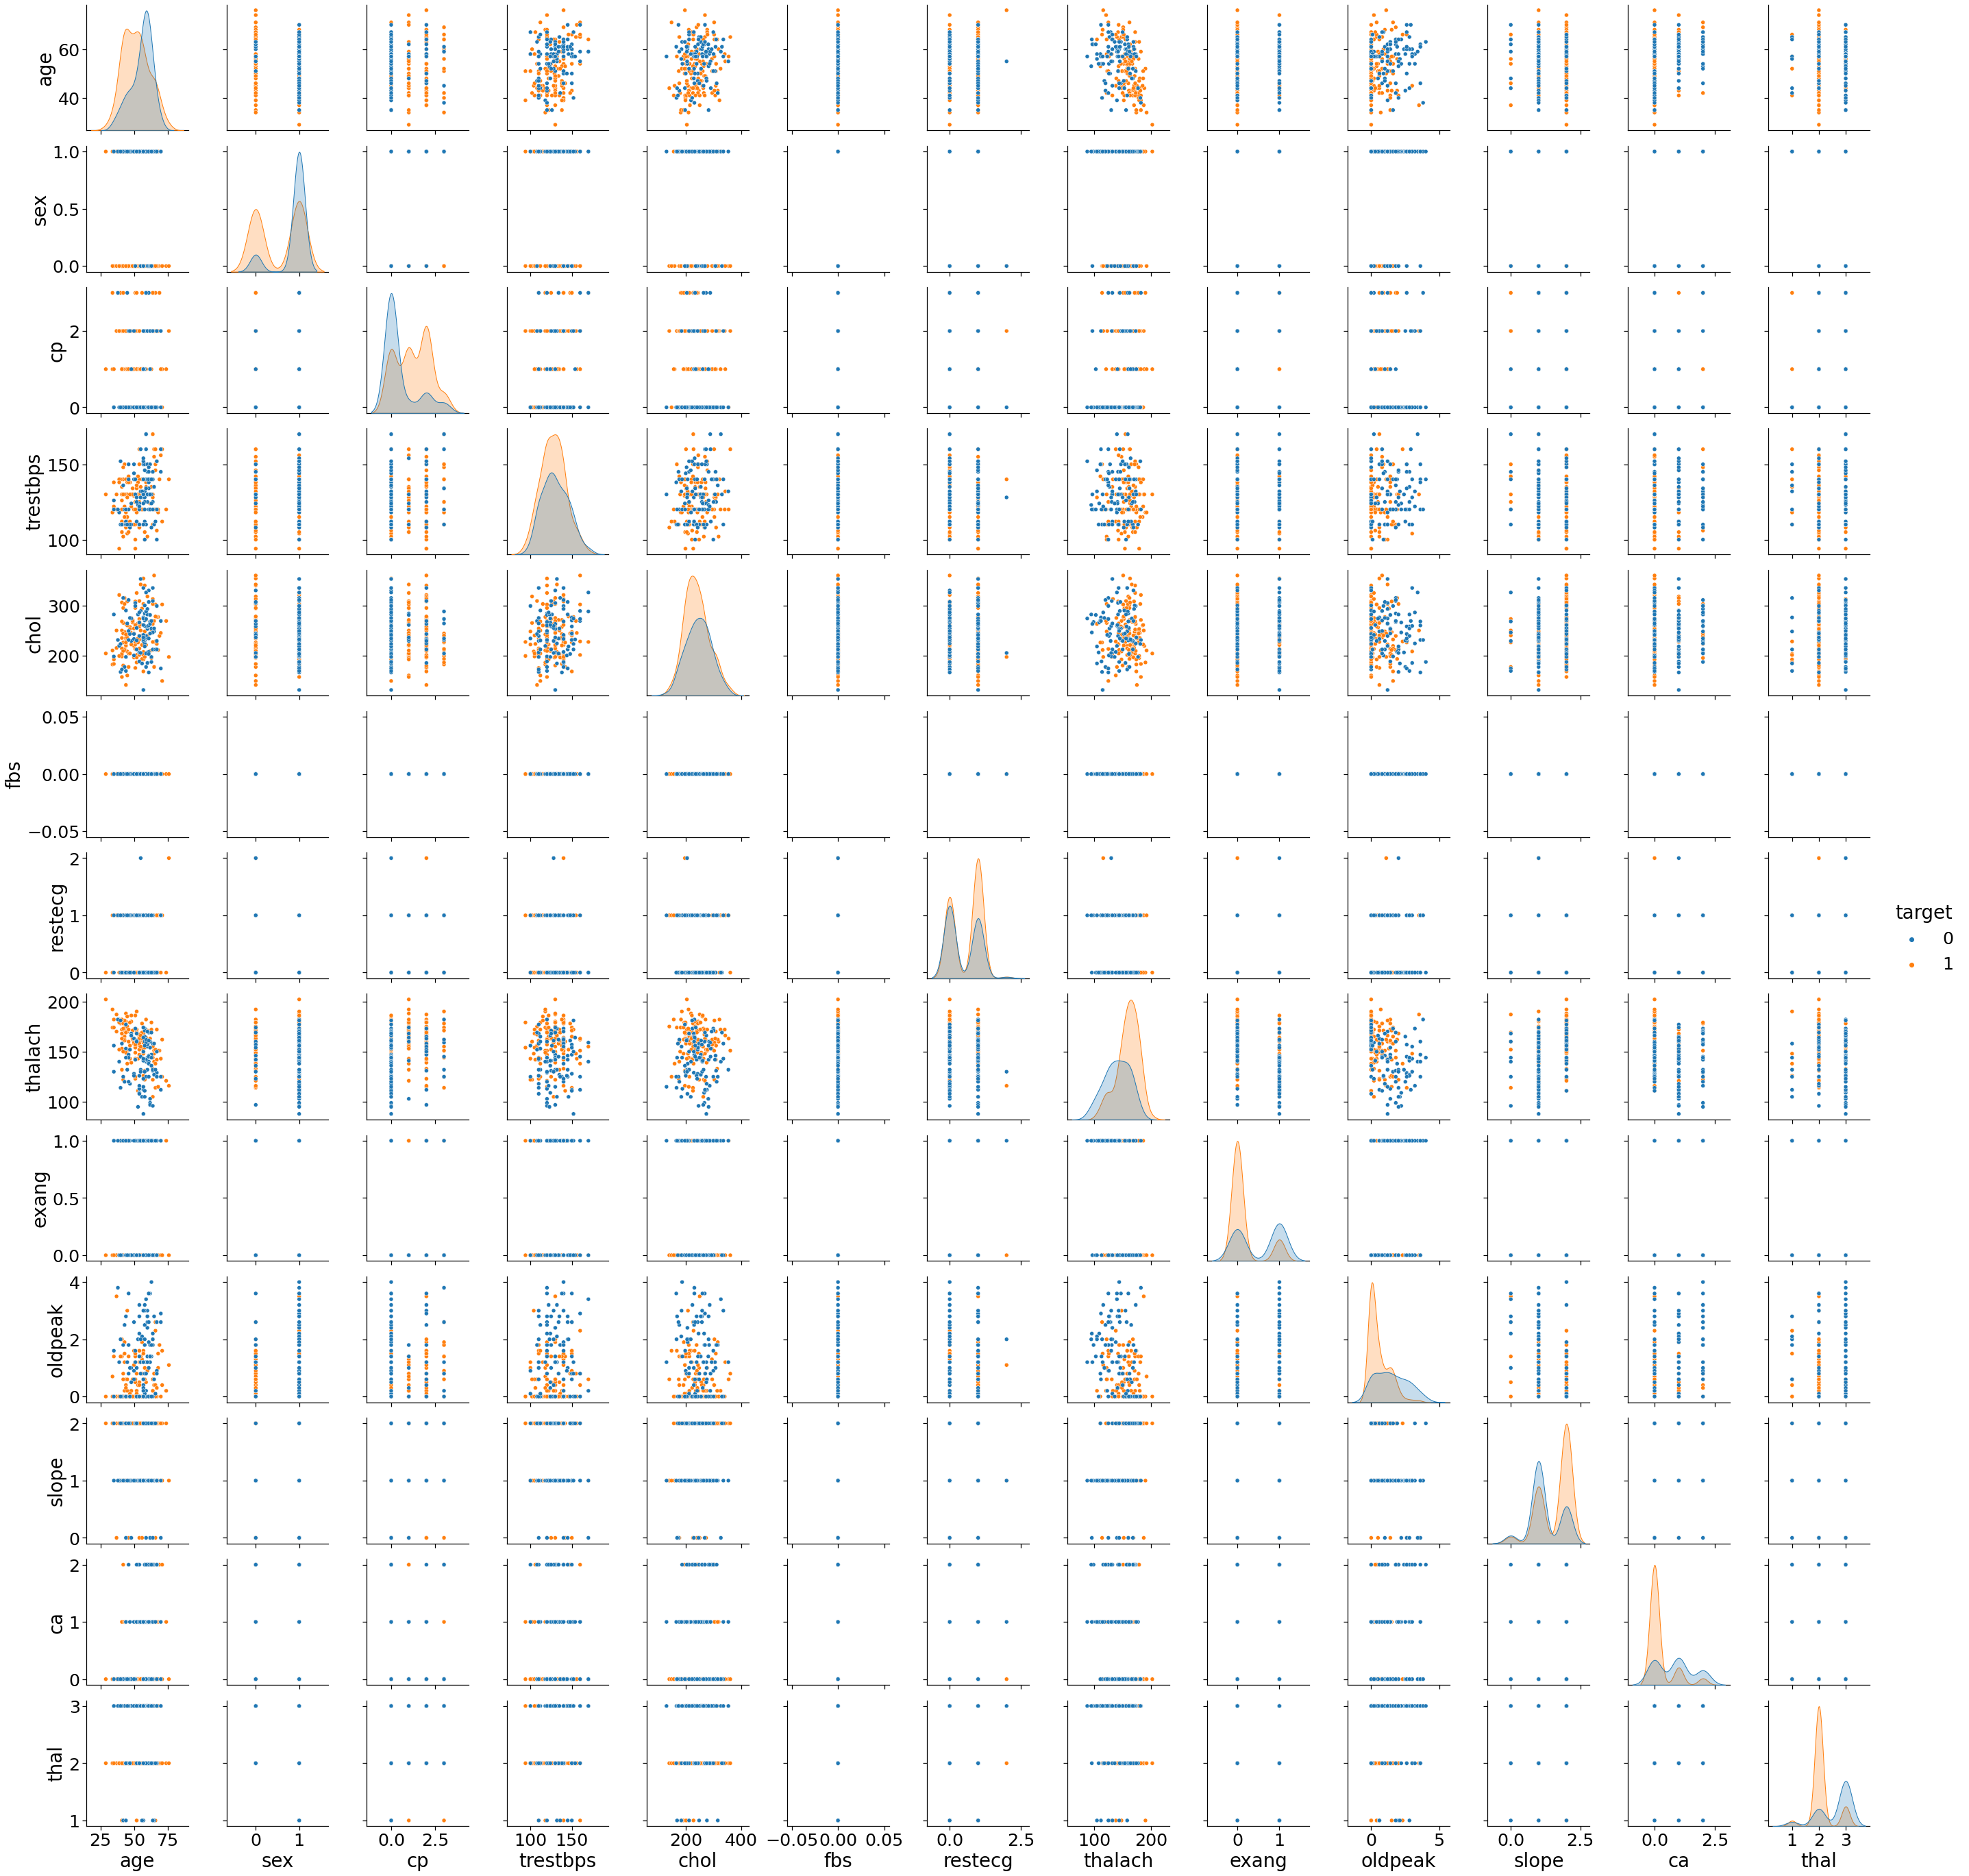

In [29]:
# Data Visualization

sns.pairplot(df, hue="target", height=3, aspect=1);

In [30]:
# Model Development

## Model Selection

y = data['target']
x = data.drop(['target'], axis=1)

In [31]:
## Traning and Testing Dataset Splitting

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [33]:
# KNN Classification on datasets

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

## knn initialization
knn = KNeighborsClassifier(n_neighbors = 5)

## Fitting knn instance on training datasets on both indices
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [41]:
# Cross validation

score = cross_val_score(knn, x_train, y_train, cv=10)
score.mean()

0.8014619883040934

In [38]:
# Prediction on y axis

y_pred_knn = knn.predict(x_test)
y_pred_knn

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0], dtype=int64)

In [39]:
# Accuracy

accuracy_score(y_test, y_pred_knn)

0.9130434782608695